In [62]:
import numpy as np
from PIL import Image
import math
import random
# Define width and height



with open('./output.txt', mode='r') as f:
    r = f.read()
    print(r.count("1")/len(r))
    w, h = int(math.sqrt(len(r))), int(math.sqrt(len(r)))
    d = np.array([int(c)*255 for c in r if c in ["0", "1"]], dtype=np.uint8).reshape(h,w)


# Make into PIL Image and save
PILimage = Image.fromarray(d)
PILimage.save('NW_2_RS_q8_2.png')

0.499333


100%|██████████| 10/10 [00:03<00:00,  2.78it/s]


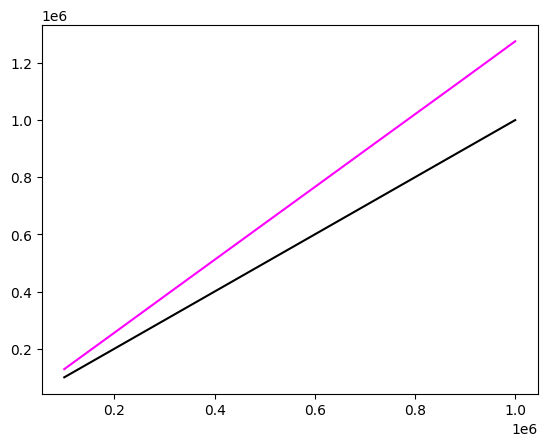

In [52]:
# graph: compression ratio as function of output length

import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

with open('./output.txt', mode='r') as f:
    data = f.read()

increment = 100000
sizes = [i * increment for i in range(1, 1 + len(data) // increment)]
compressed = []

for size in tqdm(sizes):
    r = data[:size]
    w, h = increment, len(r)//increment#int(math.sqrt(len(r))), int(math.sqrt(len(r)))
    d = np.array([int(c)*255 for c in r if c in ["0", "1"]], dtype=np.uint8).reshape(h,w)
    PILimage = Image.fromarray(d)
    PILimage.save('tmp.png')
    compressed.append(os.path.getsize("./tmp.png")*8)

plt.plot(sizes, compressed, color="magenta")
plt.plot(sizes,sizes, color="black")
plt.show()
plt.close()

100%|██████████| 10/10 [02:08<00:00, 12.87s/it]


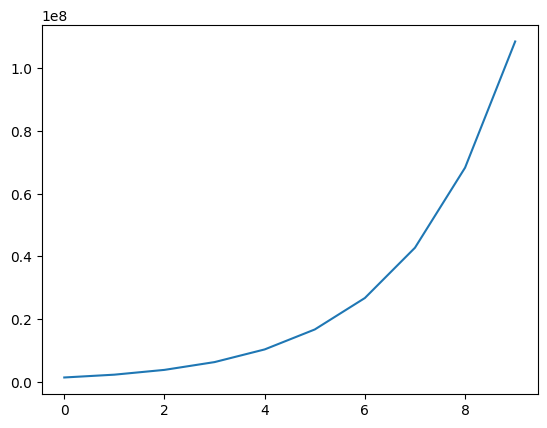

In [55]:
# iterative compression
from bitstring import BitArray

with open('./output.txt', mode='r') as f:
    r = f.read()


compressed = []

for i in tqdm(range(10)):
    w, h = int(math.sqrt(len(r))), int(math.sqrt(len(r)))
    d = np.array([int(c)*255 for c in r if c in ["0", "1"]][:w*h], dtype=np.uint8).reshape(h,w)

    PILimage = Image.fromarray(d)
    PILimage.save('tmp.png')
    compressed.append(os.path.getsize("./tmp.png")*8)

    with open("./tmp.png", "rb") as fp:
        data = fp.read()
        r = BitArray(data).bin
    
    assert len(r) == compressed[-1]

plt.plot(compressed)
plt.show()



In [ ]:
# cyclic application of 